In [1]:
# Import Libraries 

import pandas as pd
import numpy as np


import scipy.stats as stats
from scipy.stats import pearsonr, spearmanr

import matplotlib.pyplot as plt
import seaborn as sns

from util_code import generate_feature_selection_data, generate_classif_cat_features, \
    generate_regression_feature_selection


from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.base import BaseEstimator, TransformerMixin



plt.rcParams['figure.figsize'] = 8, 5

%matplotlib inline
#%matplotlib widget

In [2]:
data = pd.read_csv('data/final_project_lending.csv', low_memory=False)

# Objectives

1. Take a **quick look** at your dataset. If you could say something about it in two sentences, what would it be?

2. **Data Visualization**. *A picture is worth a thousand words.* Do not forget all the tips made on the Data Visualization class!

    2.1. Pick two numerical variables. Create a **scatter plot**. Describe what you see.  
    2.2. Create a **bar plot** from the data that you think is relevant. Explain.  
    2.3. Create a beautiful **heatmap**. Remember what are they useful to show (correlations...)?  
    2.4. Create a **distribution plot** with a feature broken down by target. Don't forget to add some alpha.  
    2.5. (Optional, but incentivized) Create an additional **insightful plot**. Describe the insight.  

3. Fully characterize, in term of **descriptive statistics**, the variables `id`, `annual_inc` and `grade`.

4. Correlation.

    4.1. What are the two most correlated numerical features (Spearman) - absolute number?  
    4.2. What is the numerical feature most correlated with the target (Pearson)?  

5. Are there any **outliers**? If there are, solved them. **Justify** all detected outliers, and **justify** the method you chose to eliminate. 

6. Deal with the **missing values**, along with anomalies. Detect and eliminate them. Remember: not all missing values are represented by a `np.nan`.

7. **Feature Selection**. Select at least two numerical features to drop. Justify the method(s) you used, and why you chose those variables. (Note: you can drop more variables, either categorical or numerical.)

8. **Pipelines** (scikit-learn). Load the dataset again and **select only the numerical variables**.

    8.1. Create a pipeline with three steps: (1) [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html) with `strategy=’median’`; (2) One Scaler you may know; (3) [Principal Component Analysis](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) (with final 5 features)  
    8.2. Fit and Transform your dataset.  
    8.3. Comment what you obtained.  

9. Create a new Pipeline with, **at least, one Transformer created by you**. This Transformer should help on solving one of the issues the dataset has such as for example, outliers, dropping columns based on any particular characteristic, encoding, etc. Then, fit and transform the dataset. NOTE: you can choose to work only with **numerical** or **categorical** variables to ease your work.

# EXERCISE 1
Take a **quick look** at your dataset. If you could say something about it in two sentences, what would it be?

In [3]:
# To visualize our dataset and shape

data

,id,grade,annual_inc,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
0,11454641,A,100000.0,1,1,RENT,26.27,credit_card,36 months,1,NaN,43.2,0.0,0.160624,0
1,9604874,A,83000.0,0,4,OWN,5.39,credit_card,36 months,0,NaN,21.5,0.0,0.810777,0
2,9684700,D,78000.0,0,11,MORTGAGE,18.45,debt_consolidation,60 months,1,NaN,46.3,0.0,0.035147,1
3,9695736,D,37536.0,0,6,MORTGAGE,12.28,medical,60 months,0,NaN,10.7,0.0,0.534887,1
4,9795013,D,65000.0,0,11,MORTGAGE,11.26,debt_consolidation,36 months,0,NaN,15.2,0.0,0.166500,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,6595657,B,27000.0,0,9,RENT,18.36,debt_consolidation,36 months,1,NaN,46.5,0.0,0.821782,1
19996,1576331,B,45000.0,0,2,MORTGAGE,23.22,major_purchase,36 months,0,NaN,46.2,0.0,0.652200,0
19997,6645736,B,104000.0,0,5,MORTGAGE,13.27,debt_consolidation,36 months,1,NaN,78.5,0.0,0.482555,0
19998,6625736,A,38400.0,0,2,MORTGAGE,12.84,debt_consolidation,36 months,0,NaN,47.4,0.0,0.822980,0


In [4]:
# To have a deep understanding of our dataset and distribution of the data

data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,20000.0,NaN,NaN,NaN,7590662.0763,1609593.299099,586040.0,6206282.75,7378896.5,8766234.75,11454641.0
grade,20000,7,B,6042,NaN,NaN,NaN,NaN,NaN,NaN,NaN
annual_inc,20000.0,NaN,NaN,NaN,73349.57835,45198.567255,8412.0,47000.0,65000.0,88000.0,1000000.0
short_emp,20000.0,NaN,NaN,NaN,0.1125,0.315989,0.0,0.0,0.0,0.0,1.0
emp_length_num,20000.0,NaN,NaN,NaN,6.8214,3.77423,0.0,3.0,7.0,11.0,11.0
home_ownership,18509,3,MORTGAGE,9844,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dti,19846.0,NaN,NaN,NaN,16.587841,7.585812,0.0,10.8525,16.19,22.06,34.99
purpose,20000,12,debt_consolidation,12337,NaN,NaN,NaN,NaN,NaN,NaN,NaN
term,20000,3,36 months,14969,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last_delinq_none,20000.0,NaN,NaN,NaN,0.5466,0.497836,0.0,0.0,1.0,1.0,1.0


In [5]:
# To check the type of data 

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     20000 non-null  int64  
 1   grade                  20000 non-null  object 
 2   annual_inc             20000 non-null  float64
 3   short_emp              20000 non-null  int64  
 4   emp_length_num         20000 non-null  int64  
 5   home_ownership         18509 non-null  object 
 6   dti                    19846 non-null  float64
 7   purpose                20000 non-null  object 
 8   term                   20000 non-null  object 
 9   last_delinq_none       20000 non-null  int64  
 10  last_major_derog_none  574 non-null    float64
 11  revol_util             20000 non-null  float64
 12  total_rec_late_fee     20000 non-null  float64
 13  od_ratio               20000 non-null  float64
 14  bad_loan               20000 non-null  int64  
dtypes:

In [6]:
# As we observed above, out variable target is defined as 'int', and we want it to be defined as 'category', because is a categorical variable.

data['bad_loan'] = data['bad_loan'].astype('category')

data['bad_loan'].dtype

CategoricalDtype(categories=[0, 1], ordered=False)

In [7]:
print(data.isnull().sum())
print('\n')
print(round(data.isnull().mean()*100,2))



id                           0
grade                        0
annual_inc                   0
short_emp                    0
emp_length_num               0
home_ownership            1491
dti                        154
purpose                      0
term                         0
last_delinq_none             0
last_major_derog_none    19426
revol_util                   0
total_rec_late_fee           0
od_ratio                     0
bad_loan                     0
dtype: int64


id                        0.00
grade                     0.00
annual_inc                0.00
short_emp                 0.00
emp_length_num            0.00
home_ownership            7.46
dti                       0.77
purpose                   0.00
term                      0.00
last_delinq_none          0.00
last_major_derog_none    97.13
revol_util                0.00
total_rec_late_fee        0.00
od_ratio                  0.00
bad_loan                  0.00
dtype: float64


In [8]:
data['bad_loan'].value_counts().to_frame()

,bad_loan
0,16000
1,4000


<AxesSubplot:>

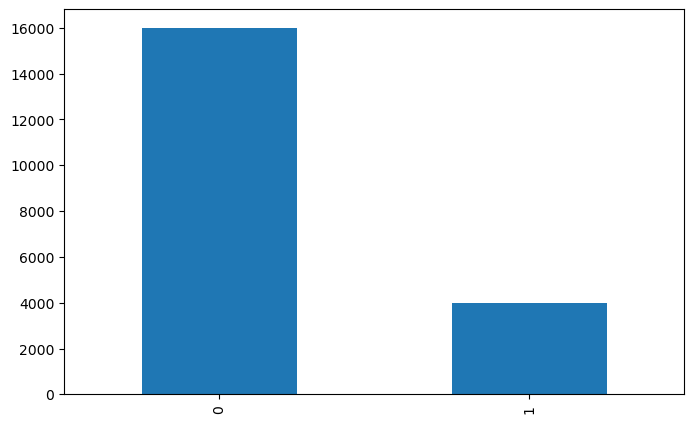

In [9]:
data['bad_loan'].value_counts().plot(kind='bar')

After a quick look through my data, I would say that I have a binary classification problema, being the variable target `bad_loan` imbalanced. 

We have 20000 observations, and 14 variables (excluding `id`). From this 14 variables, 5 are categorical() and 9 numerical. From our dataset, we have 3 variables with missing values `home_ownership` with 7.46% of missing values, `dti` with 0.77% of missing values, and `last_major_derog_none` with 97.13%. With just a quick look we can say that we might do apply imputation of missing values to `home_ownership` and `dti`, but we will probably delete `last_major_derog_none`, because is missing nearly all the values for this variable (rule of thumb: drop variables with more than ~40-50% of missing values). 

# EXERCISE 2
**Data Visualization**. *A picture is worth a thousand words.* Do not forget all the tips made on the Data Visualization class!

### EXERCISE 2.1

Pick two numerical variables. Create a **scatter plot**. Describe what you see.  

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   id                     20000 non-null  int64   
 1   grade                  20000 non-null  object  
 2   annual_inc             20000 non-null  float64 
 3   short_emp              20000 non-null  int64   
 4   emp_length_num         20000 non-null  int64   
 5   home_ownership         18509 non-null  object  
 6   dti                    19846 non-null  float64 
 7   purpose                20000 non-null  object  
 8   term                   20000 non-null  object  
 9   last_delinq_none       20000 non-null  int64   
 10  last_major_derog_none  574 non-null    float64 
 11  revol_util             20000 non-null  float64 
 12  total_rec_late_fee     20000 non-null  float64 
 13  od_ratio               20000 non-null  float64 
 14  bad_loan               20000 non-null 

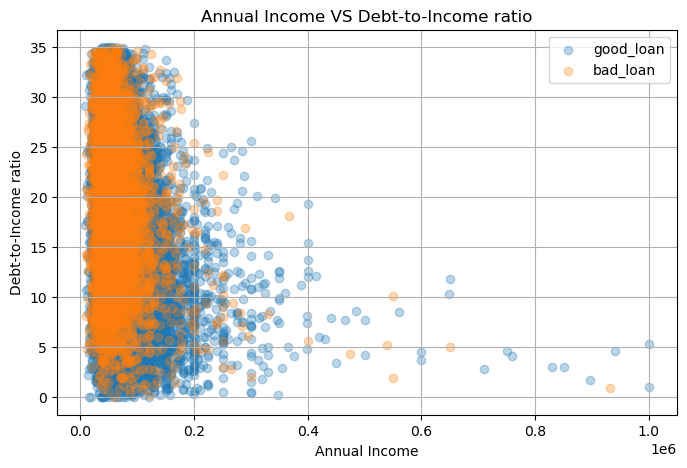

In [11]:
# scatter plot using matplotlib

targets = {
    0: "good_loan",
    1: "bad_loan",
}

for target in data['bad_loan'].unique():
    sub = data[data['bad_loan'] == target]
    plt.scatter(
        sub['annual_inc'], sub['dti'], cmap= 'spring', alpha = 0.3, label=targets[target]
    )
plt.legend()
plt.xlabel('Annual Income')
plt.ylabel('Debt-to-Income ratio')
plt.title('Annual Income VS Debt-to-Income ratio')
plt.grid()
plt.show()

My point selecting these two variables, was to try to understand how they are related. Both the Annual Income and the Debt-to-Income ratio are related. We can observe that higher the Annual Income, we have more good_loan (a loaner that paid it time), but still, we have some bad_loan with a higher Annual Income. These two variables are very correlated, but we knew it already, because dti is calculated based on the annual income. We also can observe that doesn't metter the ratio, we have bad_loan and good_loans, but the bad_loans are certainly concentrated between 0.0 and 0.2 (axis = x) and 5 to 35 (axis = y)

### EXERCISE 2.2

 Create a bar plot from the data that you think is relevant. Explain.

In [12]:
data.columns

Index(['id', 'grade', 'annual_inc', 'short_emp', 'emp_length_num',
       'home_ownership', 'dti', 'purpose', 'term', 'last_delinq_none',
       'last_major_derog_none', 'revol_util', 'total_rec_late_fee', 'od_ratio',
       'bad_loan'],
      dtype='object')

In [13]:
data.head(10)

,id,grade,annual_inc,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
0,11454641,A,100000.0,1,1,RENT,26.27,credit_card,36 months,1,NaN,43.2,0.0,0.160624,0
1,9604874,A,83000.0,0,4,OWN,5.39,credit_card,36 months,0,NaN,21.5,0.0,0.810777,0
2,9684700,D,78000.0,0,11,MORTGAGE,18.45,debt_consolidation,60 months,1,NaN,46.3,0.0,0.035147,1
3,9695736,D,37536.0,0,6,MORTGAGE,12.28,medical,60 months,0,NaN,10.7,0.0,0.534887,1
4,9795013,D,65000.0,0,11,MORTGAGE,11.26,debt_consolidation,36 months,0,NaN,15.2,0.0,0.166500,0
5,9856168,E,45600.0,1,0,MORTGAGE,1.50,medical,60 months,0,NaN,14.6,0.0,0.308410,1
6,9825536,B,45000.0,0,5,MORTGAGE,18.69,debt_consolidation,36 months,0,NaN,29.5,0.0,0.045062,1
7,7450630,D,96000.0,1,1,RENT,6.41,other,36 months,0,NaN,55.9,0.0,0.238576,0
8,9767996,G,60000.0,0,11,MORTGAGE,26.27,medical,60 months,0,NaN,94.1,0.0,0.674835,0
9,9858164,A,130000.0,0,3,MORTGAGE,14.60,medical,36 months,1,NaN,82.7,0.0,0.782383,0


In [14]:
data['short_emp'].value_counts()

0    17750
1     2250
Name: short_emp, dtype: int64

In [15]:
grouped = data.groupby(['home_ownership', 'bad_loan'])['bad_loan'].count()

unstacked = grouped.unstack(level='bad_loan')
unstacked 

bad_loan,0,1
home_ownership,,
MORTGAGE,8136,1708
OWN,1297,316
RENT,5368,1684


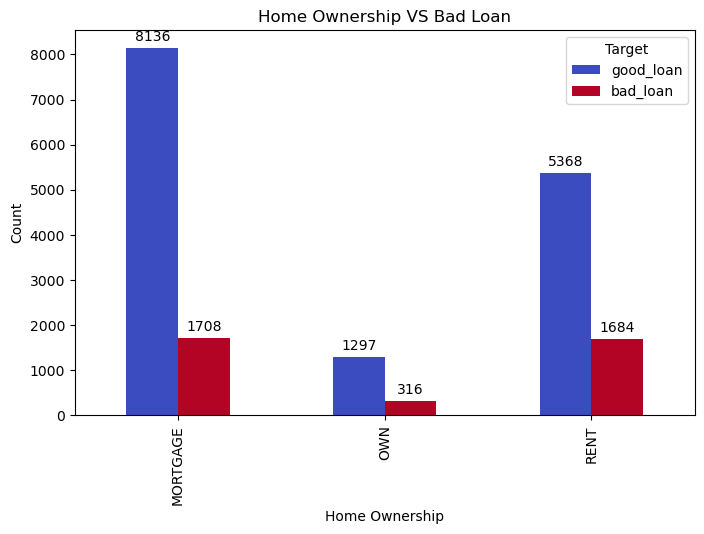

In [16]:
grouped = data.groupby(['home_ownership', 'bad_loan'])['bad_loan'].count()

# rename labels of the variable target
unstacked = grouped.unstack(level='bad_loan')


targets = {
    0: "good_loan",
    1: "bad_loan"
}


unstacked = unstacked.rename(columns = targets)


#plot
ax = unstacked.plot(kind= 'bar', cmap = 'coolwarm')

#values on top

for c in ax.containers:
    ax.bar_label(c, label_type='edge', fontsize=10, padding=3)

#labels and title
ax.set_xlabel('Home Ownership')
ax.set_ylabel('Count')
ax.set_title('Home Ownership VS Bad Loan')

#legend 

ax.legend(title='Target')

#display plot

plt.show()



My idea with this bar plot was to understand the relation between the Home ownership and the type of loan (good or bad). So, I wanted to see, what does imply for the target, the type of Home Ownership of the credit applicants. 

As we can observe, the majority of the credit applicants are paying a mortage, which make sense, being the majority a good loan. The catory that shows a higher number of bad_loan is **mortage**, but the **rent** category is nearly bellow. The **OWN** category is the one that shows a lower number of loans, and the lower number of bad_loans.

### EXERCISE 2.3

Create a beautiful **heatmap**. Remember what are they useful to show (correlations...)?   

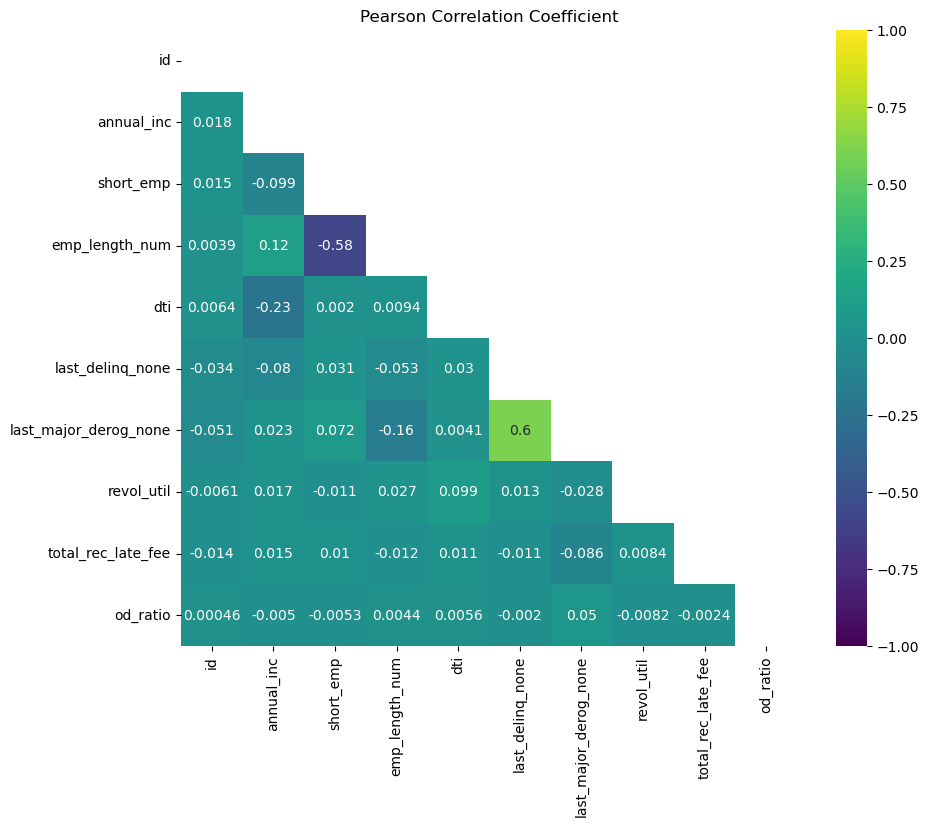

In [17]:
# To change the fig size
fig, ax = plt.subplots(figsize=(10, 8))


corr = data.corr()

sns.heatmap(
    corr, 
    vmin=-1., 
    vmax=1.,
    cmap='viridis', 
    square=True, 
    annot=True,
    mask=np.triu(corr.notnull()), 
    ax=ax
)

ax.set_title('Pearson Correlation Coefficient')

plt.show()

For this heatmap I only used numerical variables, i.e., I didn't include the variable target - categorical variable, but bool (binary categorical variable).

In this heatmap, is calculated the pearson correlation coefficient between all independent variables, we conclude that the variables with higher correlation is `last_major_derog_none` with `last_delinq_none` with a correlation of 0.6, the second highest correlation is `emp_length_num` with `short_emp` with a correlation of 0.58.



 ### EXERCISE 2.4
 
 Create a **distribution plot** with a feature broken down by target. Don't forget to add some alpha.

In [18]:
# reshape the data

unpivot = data.melt(value_vars=["annual_inc", "bad_loan"])
unpivot

,variable,value
0,annual_inc,100000.0
1,annual_inc,83000.0
2,annual_inc,78000.0
3,annual_inc,37536.0
4,annual_inc,65000.0
...,...,...
39995,bad_loan,1.0
39996,bad_loan,0.0
39997,bad_loan,0.0
39998,bad_loan,0.0


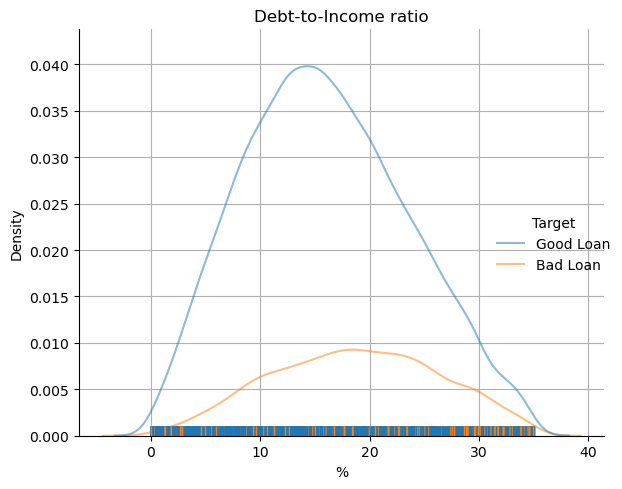

In [19]:
x = data['dti']
y = data['bad_loan']

#new column to map the original values of the variable target

data['Target'] = y.replace({0: 'Good Loan', 1: 'Bad Loan'})


#plot
sns.displot(data, x=x, hue='Target', alpha=0.5, kind="kde", rug=True)


#Axis labels and title
plt.xlabel('%')
plt.grid()
plt.title('Debt-to-Income ratio')

#Center plot
plt.tight_layout()

#display plot
plt.show()


On this plot we can observe that applicants labeled with good_loan (they will pay the credit), have a higher Debt-to-Income ratio than the applicants labeled with bad_loan. Which make sense. 

### EXERCISE 2.5

(Optional, but incentivized) Create an additional **insightful plot**. Describe the insight.

For this exercise, we will create a **pairplot**, so visualize how the the relations in our dataset. Is a good plot to summarize our data. 

In [20]:
# Check variables to select the ones we want to visualize in the plot

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   id                     20000 non-null  int64   
 1   grade                  20000 non-null  object  
 2   annual_inc             20000 non-null  float64 
 3   short_emp              20000 non-null  int64   
 4   emp_length_num         20000 non-null  int64   
 5   home_ownership         18509 non-null  object  
 6   dti                    19846 non-null  float64 
 7   purpose                20000 non-null  object  
 8   term                   20000 non-null  object  
 9   last_delinq_none       20000 non-null  int64   
 10  last_major_derog_none  574 non-null    float64 
 11  revol_util             20000 non-null  float64 
 12  total_rec_late_fee     20000 non-null  float64 
 13  od_ratio               20000 non-null  float64 
 14  bad_loan               20000 non-null 

> **Note:** I did my selection based on the heatmap in exercise 2.3, because all the variable were too much, so I did a selection based on the correlation (with a lower correlation). 

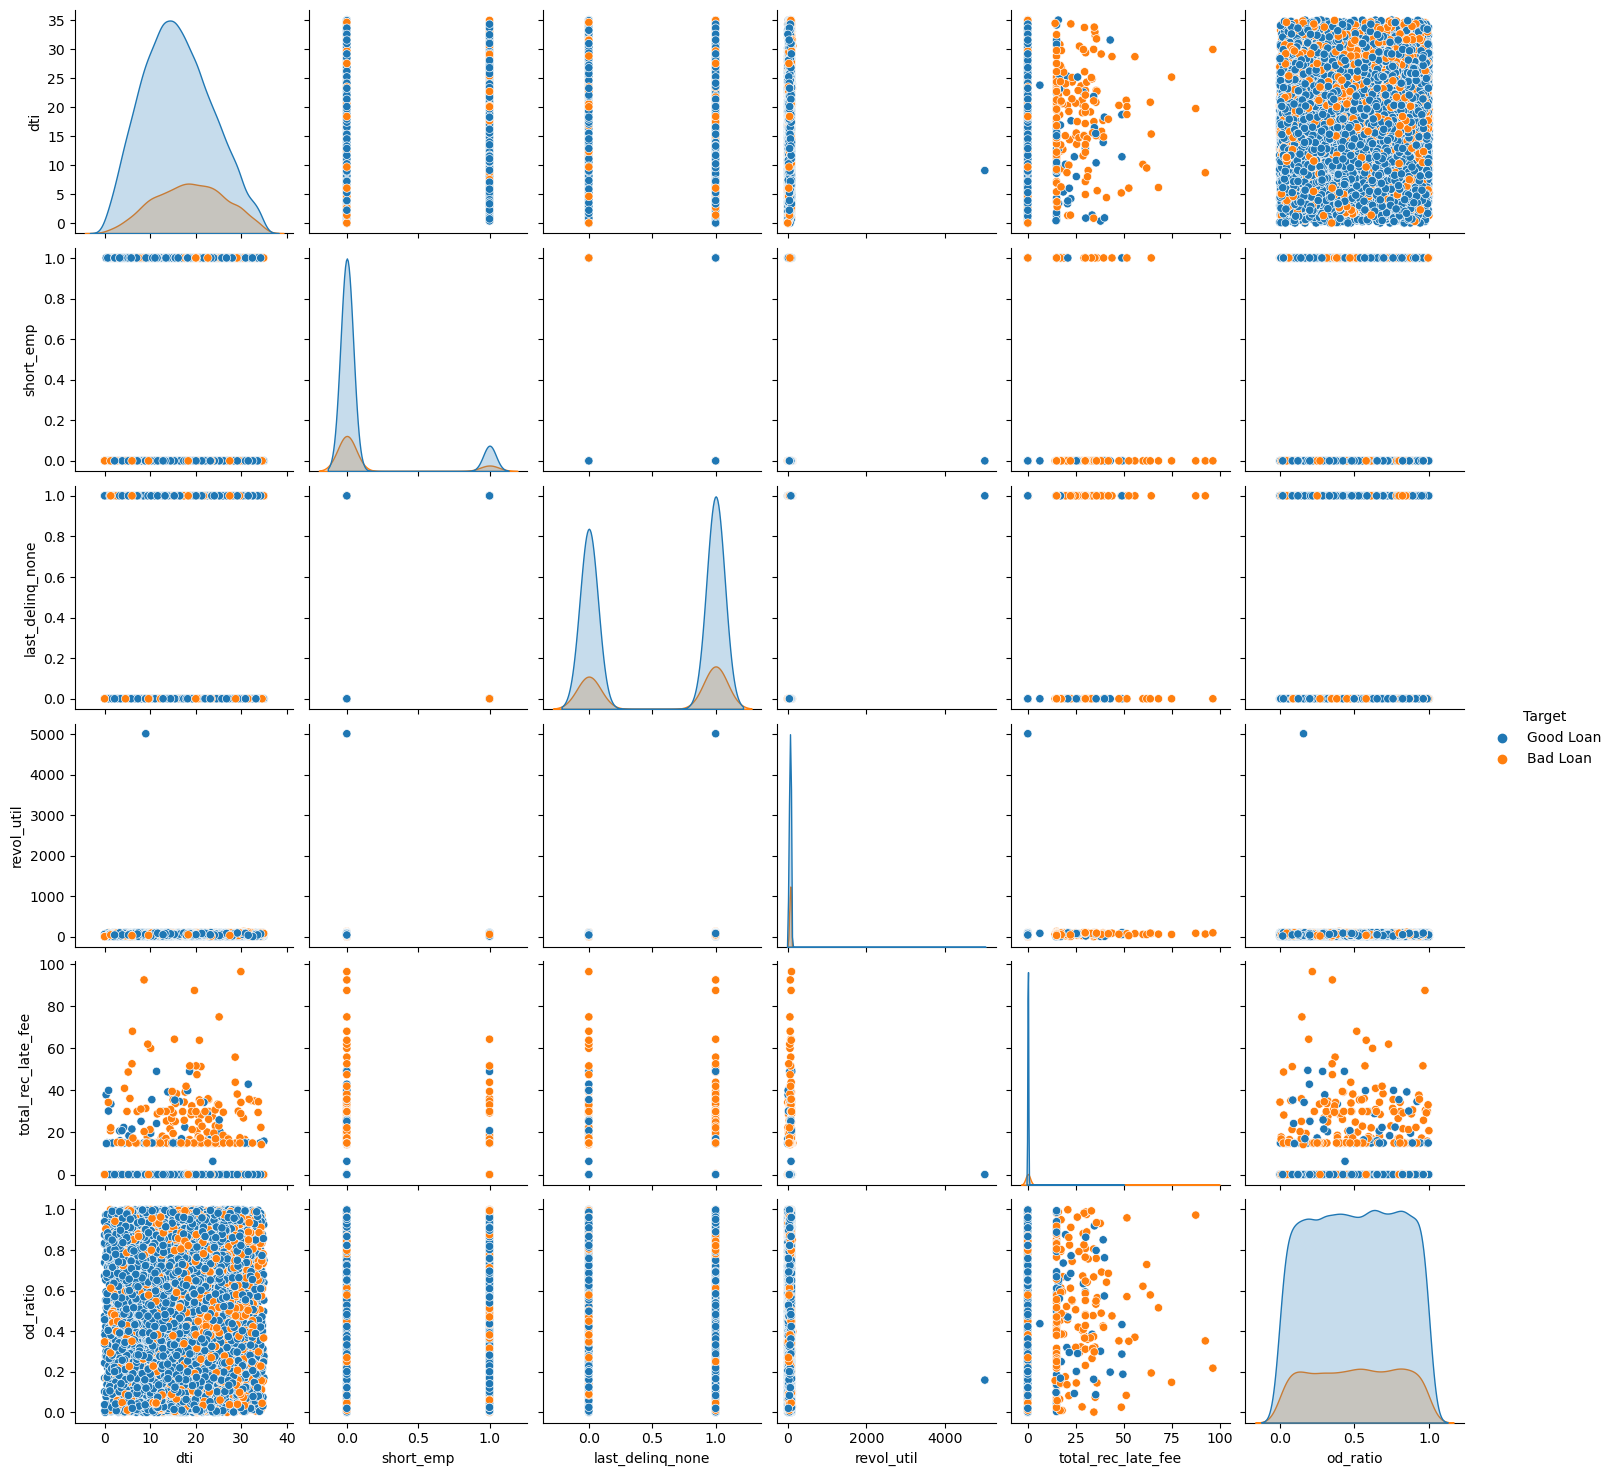

In [21]:
sns.pairplot(
    data,
    vars=[
        'dti',
        'short_emp','last_delinq_none',
        'revol_util', 'total_rec_late_fee',
        'od_ratio'
    ],
    hue="Target"
);

I think we can say that the variables, are in genereal quite well distributed, they have a balanced distribution between the target. We have more good_loan than bad loan. It's very interesting the plot `od_ratio` vs `dti`, because, `bad_loan` applicants with a high `dti`, and, comprehensively, with a high `od_ratio`.

Which, if I am getting it right, we have some bad_loan applicants with a high `dti`  (measure of the credit applicant ability to repay the loan, based on their income and existing debts), which I think it doesn't make much sense. We also can observe on the plot `dti` vs `od_ratio` and `total_rec_late_fee` vs `dti`, that a good part of the bad_loans are located with a considerable high `dti` (between 20 and 40), maybe it's more visible in the plot `dti` vs `od_ratio`.

In [22]:
# Drop `Target`, because we don´t need it anymore.

data.drop('Target', axis = 1, inplace = True)

# EXERCISE 3

Fully characterize, in term of **descriptive statistics**, the variables `id`, `annual_inc` and `grade`.

##### **a)** Variable `id`

The variable id only gives us the information of the unique number of each observation. With the information of the id we can count the total number of observations and it helps us to find observations when we are cleaning the data, it can tell us which is the observation that might be really bad and we need to delete, for example when we have a observation that doesn´t bring any value to our variable. 

For this variables we will only count the unique values and compare with the count of the column, so then we can verify if for any change we have a duplicate observatio possible to identify with the id, because the id must be unique. We can also verify if there are any missing values, but usually we don't have missing values on this variables, because is the identification of each observation presented on th dataset, but it could be deleted we never know.

> **First step:** Missing values 

In [23]:
data['id'].isnull().sum()

0

No missing values.

> **Seconde step:** Verify total unique, total observations and dataset shape.

In [24]:
print ('Total Unique:', data['id'].nunique())
print ('Total Observations:', data['id'].count())
print ('Shape:', data.shape)

Total Unique: 20000
Total Observations: 20000
Shape: (20000, 15)


As we can see above, we have a total of 20000 unique values for variable `id`, and we can confirm that the total of 20000 values on `id`, and the total of observations on our dataset is 20000 (as we can observe in shape). 

##### **b)** Variable `annual_inc`

> **Step 1:** we will visualize the variable `annual_inc` in a histogram plot, using 30 bins.

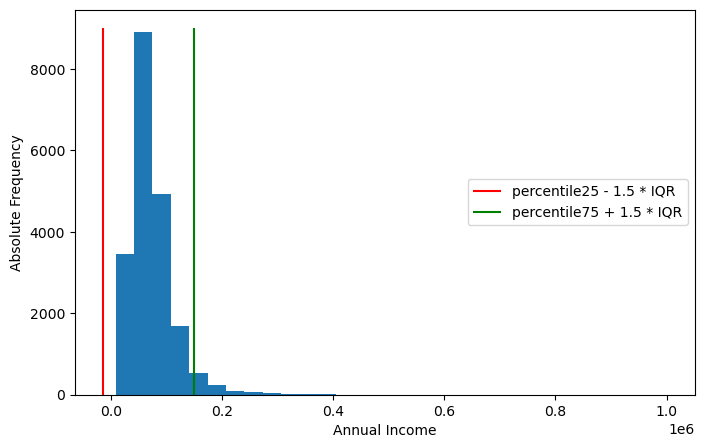

In [25]:
# Define mean and std for `.vlines()`

mean = data['annual_inc'].mean()
std = data['annual_inc'].std()



# Histogram Plot
plt.hist(data['annual_inc'], bins=30)

#A.C. for .vlines

percentile25 = data['annual_inc'].quantile(0.25)
percentile75 = data['annual_inc'].quantile(0.75)
iqr = percentile75 - percentile25

# vlines
plt.vlines([percentile25 - 1.5*iqr], 0, 9000, colors='r', label='percentile25 - 1.5 * IQR')
plt.vlines([percentile75 + 1.5*iqr], 0, 9000, colors='g', label='percentile75 + 1.5 * IQR')

# Lables and title
plt.xlabel('Annual Income')
plt.ylabel('Absolute Frequency')
plt.legend(loc='center right')

#Display plot
plt.show()

We can observe that our variabe is imbalenced. Visually we can conclude that it is **positive skewed**, and had a **positive kurtosis** (leptokurtic distribution). 

- This **positive skewness** indicates that the annual income distribution is greater than the median, meaning that there are more low- to mid-range earners than high earners. This positive skewness can be a caused by various factors, such as  income inequality or a highly skewed distribution of job opportunities.


- This **positive kurtosis** indicates a distribution is more peacked and has heavier tails than normal distribution. This means that are more outliers than would be expected in a normal distribution, it indicates that e anual income distribution has higher concentration of values around the mean (as we can confirm on the table below). This can be a results of income inequeality (with a small proporrion of our sample earning a very high income while the majority earn a lower income). 

- As we can see in the plot above, we have outliers, but we will look to them more in detail in **step 4**.

> **Step 2:** we will start for checking the measures of spread (variables's distribution) as well as missing values.  

In [26]:
data['annual_inc'].describe(include='all').to_frame()

,annual_inc
count,20000.000000
mean,73349.578350
std,45198.567255
min,8412.000000
25%,47000.000000
50%,65000.000000
75%,88000.000000
max,1000000.000000


In [27]:
# percentiles 2% and 95%

print('Percentil 2%:', data['annual_inc'].quantile(0.02))
print('Percentil 95%:', data['annual_inc'].quantile(0.95))

Percentil 2%: 25000.0
Percentil 95%: 145000.0


Analizing the measues of spread of the annual income, we can conclude what we have said above, we have a significant inequality (would be interesting to have a the gender variables here, to compare between genders the inequality on annual income).

As we can observe above, the mean is 73349.57, however the percentil 2% is only 25000, and the percentil 25% 47000, and de median (percentil 50%) is already 65000, such significant difference, and we end up with the percentil 95% with 145000. We have here very different levels of capacity of paying loans, different levels in a financial capacity level, we can consider our sample heterougenous (credit applicants on our sample).   

> **Step 3:** Skewness and Kurtosis:

In [28]:
print('Skewness:', stats.skew(data['annual_inc']))
print('Kurtosis:', stats.kurtosis(data['annual_inc']))

Skewness: 5.275648123592321
Kurtosis: 66.72665803201564


**Skewness:** When skewness values are beyond -2 and +2 it means that the skewness is considered indicative of substancial nonnormality, which we already conclude above on the histogram plot analysis. 

**Kurtosis:**  A positive value for the kurtosis indicates a distribution more peaked than normal, which we already conclude above. As we also conclude above, the distribution of the variable `annual_inc` is to peaked, meaning that a kurtosis greater than +2 indicates that the distribution is too peaked. 

> **Step 4:** Missing values

In [29]:
print('Missing values:', data['annual_inc'].isnull().sum())

Missing values: 0


> **Step 5:** Outliers:

[Text(0.5, 0, '')]

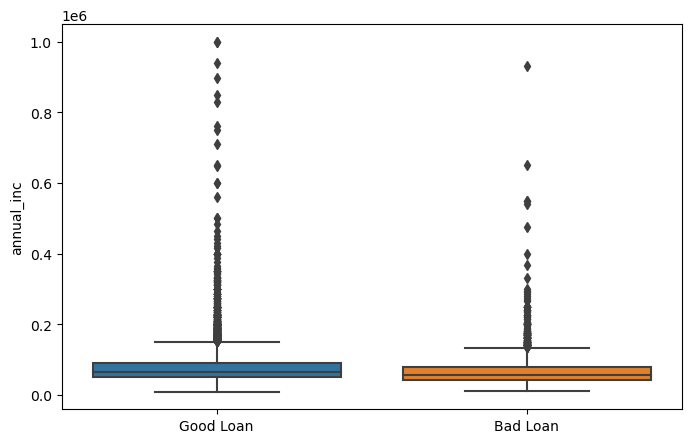

In [30]:
# # Because our distribution is not normal, we will use the method IQR to find the outliers:

#Box Plot to visualize outliers

ax = \
sns.boxplot(
    x='bad_loan', 
    y='annual_inc', 
    data=data
)

labels = ['Good Loan', 'Bad Loan']
ax.set_xticklabels(labels) 
ax.set(xlabel=None)

In [31]:
#IQR

x = data['annual_inc']


def outliers(x):
    
    percentile25 = x.quantile(0.25)
    percentile75 = x.quantile(0.75)
     
    iqr = percentile75 - percentile25
     
     
    upper_lim = percentile75 + 1.5*iqr
    lower_lim = percentile25 - 1.5*iqr
    
    r = (x < lower_lim) | (x > upper_lim)
    
    return r.sum()


print('Number of outliers:', outliers(data['annual_inc']))

Number of outliers: 926


> As we already add conclude above, we have outliers, but now we are sure of how many they are, which according the method IQR are **926 outliers**. 

##### **c)** Variable `grade`

(Because Grade is a categorical variable, we will we will verify the unique values, the number of unique values, and the mode.) `delete`

> **Step 1:** Visualize variable in a plot and check value counts

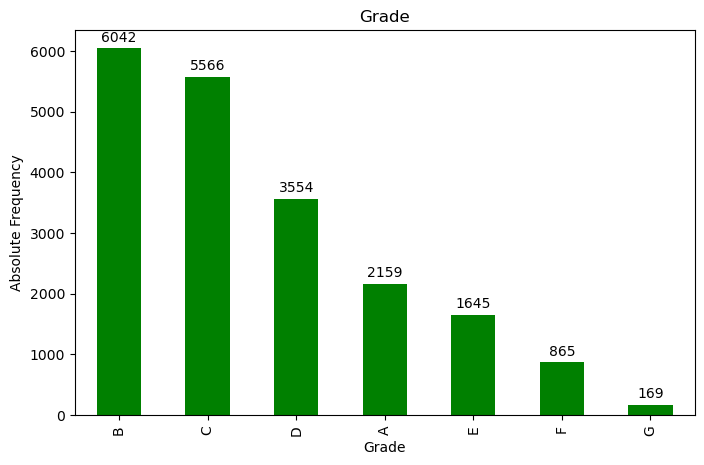

In [32]:
ax = data['grade'].value_counts().plot(kind='bar', color='g')

for c in ax.containers:
    ax.bar_label(c, label_type='edge', fontsize=10, padding=3)


# Lables and plot title    
plt.xlabel('Grade')
plt.ylabel('Absolute Frequency')
plt.title('Grade')

plt.show()

> **Step 2:** Measures of Central Tendency

In [33]:
#How many unique values, and total of uniques 

print('Uniques:', data['grade'].unique().tolist())
print('Number of Uniques:', data['grade'].nunique())

Uniques: ['A', 'D', 'E', 'B', 'G', 'C', 'F']
Number of Uniques: 7


In [34]:
data['grade'].describe().to_frame()

,grade
count,20000
unique,7
top,B
freq,6042


In [35]:
#Mode

data['grade'].mode()[0]

'B'

In [36]:
# Top 3 most frequent 

data['grade'].value_counts().head(3).to_frame()

,grade
B,6042
C,5566
D,3554


**Note:** In terms of categorical variables, top is the same as mode, but we calculated both as welll.

> **Step 3:** Missing Values

In [37]:
print('Missing values:', data['grade'].isnull().sum())

Missing values: 0


From this analysis, we conclude that the mode is `B` with a frequency of 6042, que total number of observations is 2000, and we have 7 unique values: 'A', 'D', 'E', 'B', 'G', 'C', 'F'.

# EXERCISE 4

Correlation.

 ### EXERCISE 4.1
 
 What are the two most correlated numerical features (Spearman) - absolute number?

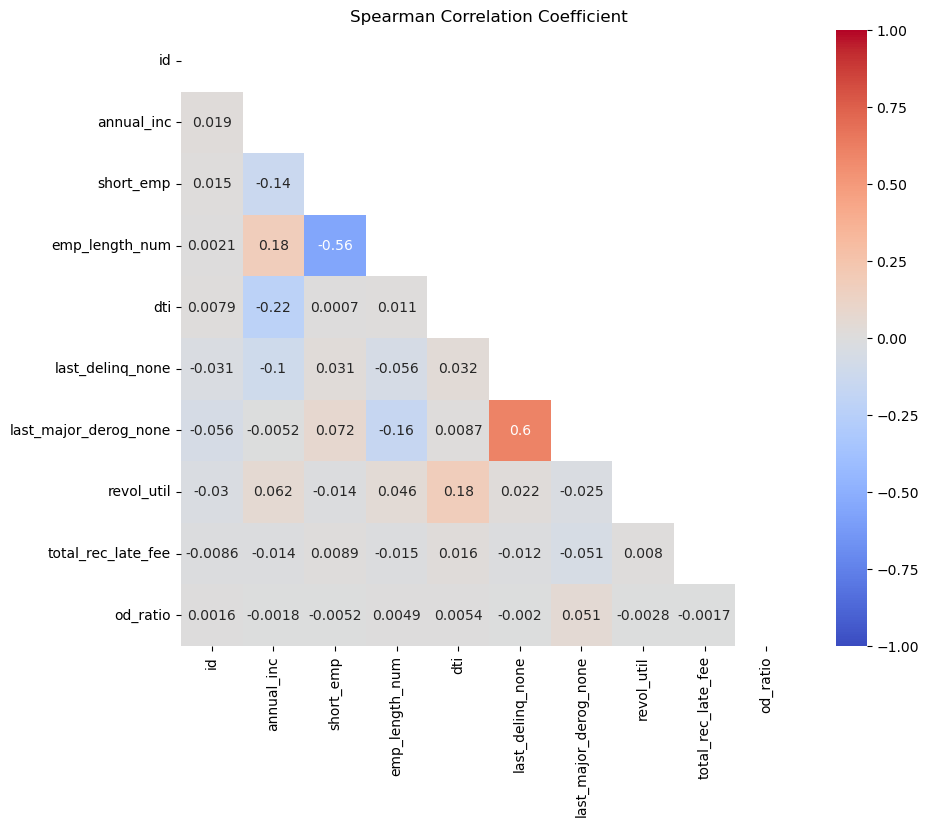

In [38]:
# Heatmap

fig, ax = plt.subplots(figsize=(10, 8))

corr = data.corr(method="spearman")

mask = np.triu(np.ones_like(corr))

sns.heatmap(
    corr, vmin=-1, vmax=1, annot=True, square=True, cmap="coolwarm",
    mask=mask
)

ax.set_title('Spearman Correlation Coefficient')

plt.show()

> Applying Spearmen correlation coefficient,the two variables most correlated are `ast_major_derog_none` and `last_delinq_none` with  a correlation of 0.6, however we don't need to worry much, because is above 0.7.

### EXERCISE 4.2

 What is the numerical feature most correlated with the target (Pearson)?

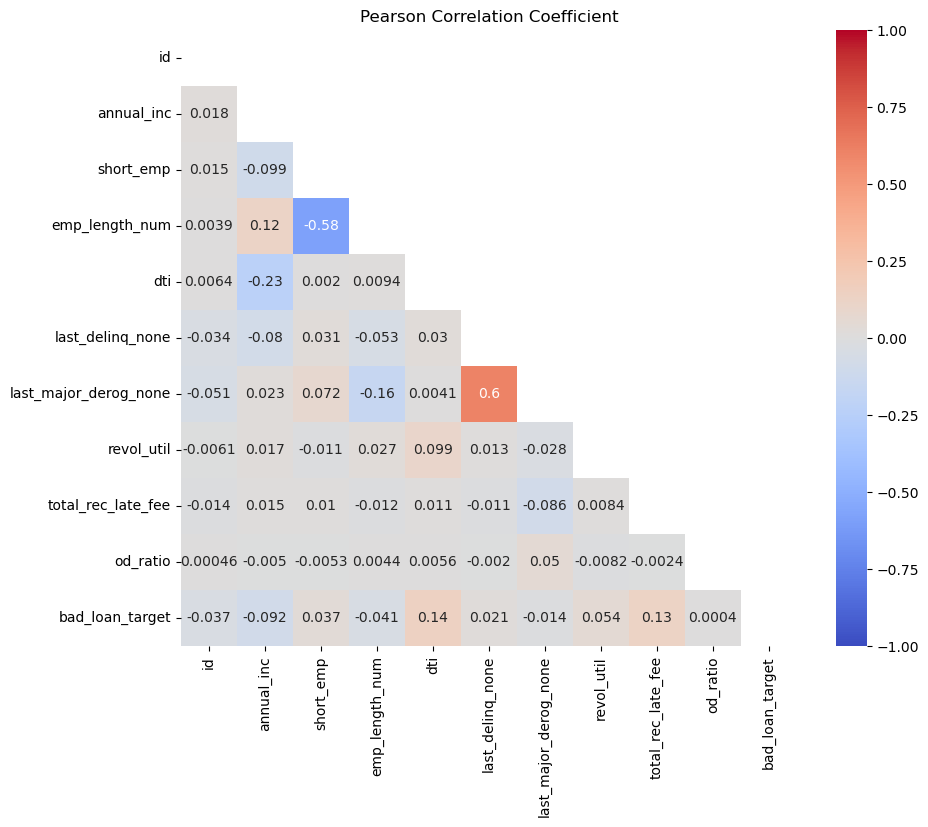

In [39]:
# Heatmap

fig, ax = plt.subplots(figsize=(10, 8))

data['bad_loan_target'] = data['bad_loan'].astype('bool') # so then appears on our heatmap

corr = data.corr(method="pearson")

mask = np.triu(np.ones_like(corr))

sns.heatmap(
    corr, vmin=-1, vmax=1, annot=True, square=True, cmap="coolwarm",
    mask=mask
)

ax.set_title('Pearson Correlation Coefficient')

plt.show()

> **Note:** Because we already defined the variable `bad_loan` as category, it doesn´t appear in the heatmap. For that reason, what I did here was to create a new variable based on `bad_loan`, but transforming it into bool, so then it can be part of the heatmap: `bad_loan_target`.

The variable that has the higher correlation with the variable targe is `dti` (0.14), which make sense because `dti` is a measure of credit applicants ability to repay the loan, based on their income and existing debts.

In [40]:
# Because we don´t need anymore this new variable `bad_loan_target`, we can now drop it.

data = data.drop('bad_loan_target', axis = 1)

# EXERCISE 5

Are there any **outliers**? If there are, solved them. **Justify** all detected outliers, and **justify** the method you chose to eliminate.

#### a) Find outliers

In [41]:
# Find numeric variables

numeric_cols = data.select_dtypes(include=['number'])
numeric_cols.columns

Index(['id', 'annual_inc', 'short_emp', 'emp_length_num', 'dti',
       'last_delinq_none', 'last_major_derog_none', 'revol_util',
       'total_rec_late_fee', 'od_ratio'],
      dtype='object')

In [42]:
# Find outliers, using our funcion outliers(x) (using IQR):
# We don't need to calculate for `id` because is only a unique number of identificantion.

print('Number of outliers `annual_inc`:', outliers(data['annual_inc']),'|',str((outliers(data['annual_inc']))/(data['annual_inc'].count())*100) + '%')
print('Number of outlier `short_emp`:', outliers(data['short_emp']),'|',str((outliers(data['short_emp']))/(data['short_emp'].count())*100) + '%')
print('Number of outliers `emp_length_num`:', outliers(data['emp_length_num']),'|',str((outliers(data['emp_length_num']))/(data['emp_length_num'].count())*100) + '%')
print('Number of outlier `dti`:', outliers(data['dti']),'|',str((outliers(data['dti']))/(data['dti'].count())*100) + '%')
print('Number of outlier `last_delinq_none`:', outliers(data['last_delinq_none']),'|',str((outliers(data['last_delinq_none']))/(data['last_delinq_none'].count())*100) + '%')
print('Number of outliers `last_major_derog_none`:', outliers(data['last_major_derog_none']),'|',str((outliers(data['last_major_derog_none']))/(data['last_major_derog_none'].count())*100) + '%')
print('Number of outlier `revol_util`:', outliers(data['revol_util']),'|',str((outliers(data['revol_util']))/(data['revol_util'].count())*100) + '%')
print('Number of outliers `total_rec_late_fee`:', outliers(data['total_rec_late_fee']),'|',str((outliers(data['total_rec_late_fee']))/(data['total_rec_late_fee'].count())*100) + '%')
print('Number of outliers `od_ratio`:', outliers(data['od_ratio']),'|',str((outliers(data['od_ratio']))/(data['od_ratio'].count())*100) + '%')

Number of outliers `annual_inc`: 926 | 4.63%
Number of outlier `short_emp`: 2250 | 11.25%
Number of outliers `emp_length_num`: 0 | 0.0%
Number of outlier `dti`: 0 | 0.0%
Number of outlier `last_delinq_none`: 0 | 0.0%
Number of outliers `last_major_derog_none`: 138 | 24.041811846689896%
Number of outlier `revol_util`: 2 | 0.01%
Number of outliers `total_rec_late_fee`: 231 | 1.155%
Number of outliers `od_ratio`: 0 | 0.0%


As we can observe above, we have:
- **926 | 4.63%** outliers in `annual_inc`  
- **2250 | 11.25%** outliers in `short_emp` 
- **138 | 24.04%** outliers in `last_major_derog_none`
- **2 | 0.01%** outlier in `revol_util`
- **231 | 1.15%** outliers in `total_rec_late_fee` 

#### b) Visualize outliers per variable in a boxplot

Now that we already checked how many outliers we have per variable, as well the percentage, it's time to see where they (theirs values), and then decide whihc is the best decision to handle them.  

[Text(0.5, 0, '')]

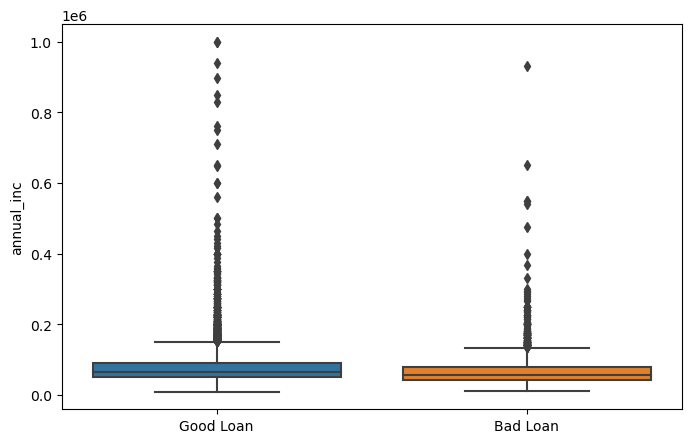

In [43]:
# Box Plot to visualize outliers
# `annual_inc` (already done in the exercise 3. b))



ax = \
sns.boxplot(
    x='bad_loan', 
    y='annual_inc', 
    data=data
)

labels = ['Good Loan', 'Bad Loan']
ax.set_xticklabels(labels) 
ax.set(xlabel=None)

> In `annual_inc` we have 4.63 % of outliers.. which is not many, but are some, so we want to avoid to delete this outliers, also because we know that thos outliers are real due o a inequelity distribution of the income, and important to our data. So to handle the outliers we will use the **binning method (equal depth)**.

[Text(0.5, 0, '')]

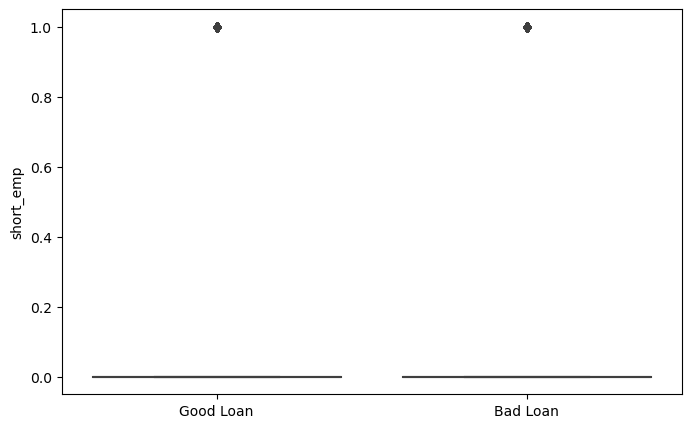

In [44]:
# Box Plot to visualize outliers
# `short_emp` (already done in the exercise 3. b))

ax = \
sns.boxplot(
    x='bad_loan', 
    y='short_emp', 
    data=data
)

labels = ['Good Loan', 'Bad Loan']
ax.set_xticklabels(labels) 
ax.set(xlabel=None)

In [45]:
data['short_emp'].value_counts()

0    17750
1     2250
Name: short_emp, dtype: int64

> In `short_emp` we have 11.24% of outliers, but by have a check to the variable, is a bool variable, so we don't need to worry about it. 

[Text(0.5, 0, '')]

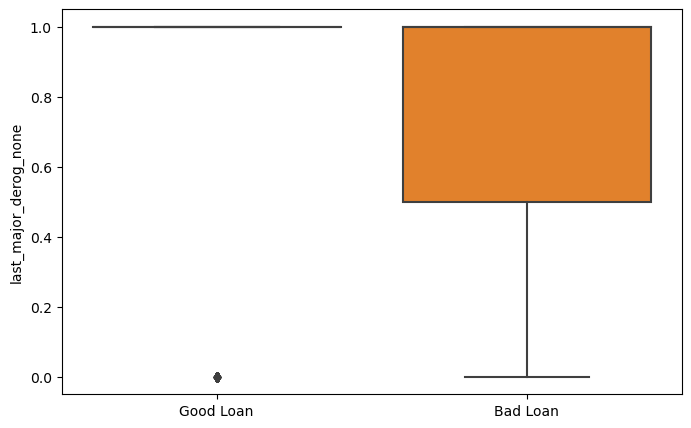

In [46]:
# Box Plot to visualize outliers
# `last_major_derog_none` 

ax = \
sns.boxplot(
    x='bad_loan', 
    y='last_major_derog_none', 
    data=data
)

labels = ['Good Loan', 'Bad Loan']
ax.set_xticklabels(labels) 
ax.set(xlabel=None)

In [47]:
data['last_major_derog_none'].value_counts()

1.0    436
0.0    138
Name: last_major_derog_none, dtype: int64

> `last_major_derog_none` it's also a bool, so we don´t need to worry about it.

[Text(0.5, 0, '')]

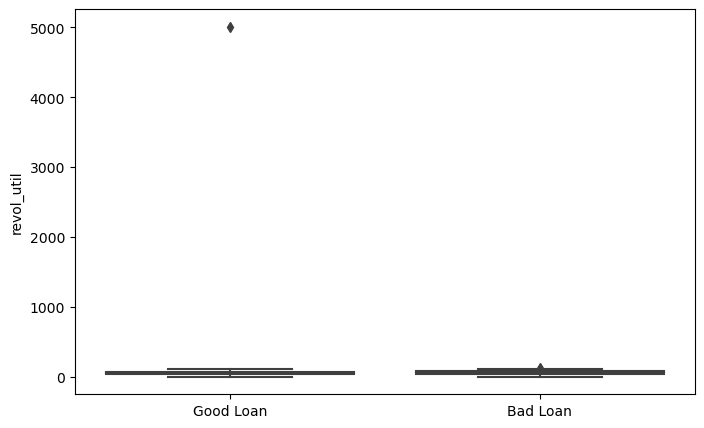

In [48]:
#1 Box Plot to visualize outliers
# `revol_util` 

ax = \
sns.boxplot(
    x='bad_loan', 
    y='revol_util', 
    data=data
)

labels = ['Good Loan', 'Bad Loan']
ax.set_xticklabels(labels) 
ax.set(xlabel=None)

(0.0, 140.0)

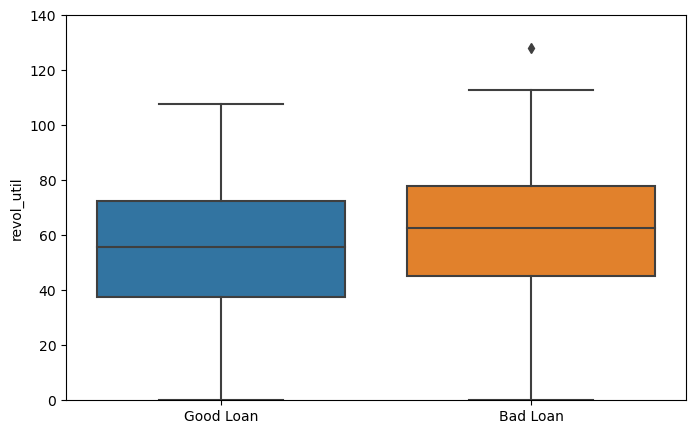

In [49]:
#2 Let's have a look to the outlier more close to the non-outliers

ax = \
sns.boxplot(
    x='bad_loan', 
    y='revol_util', 
    data=data
)

labels = ['Good Loan', 'Bad Loan']
ax.set_xticklabels(labels) 
ax.set(xlabel=None)
ax.set_ylim(0,140)

> Now, we have real outliers, as we can see in the plot above. Here we have 2 outliers (0.01%), one is very near from the non-outliers, but the other one is very distant, so the better decision is to delete this one that assumes the value of 5000, and we will keep the other one, we can see in the second plot, that this outlier is very near from the non-outliers.

> Revol_util  is a measure of the amount of credit the applicant is currently using, compared to the total amount of credit available to him. It may be true, but I rather prefer to delete, because is only one so I have some questions related to the veracity of this observation. About the outlier that assumes the value between 120 and 140, we will keep it, because in the context of this variable, I believe that is a true value, and might bring value to out model. 

[Text(0.5, 0, '')]

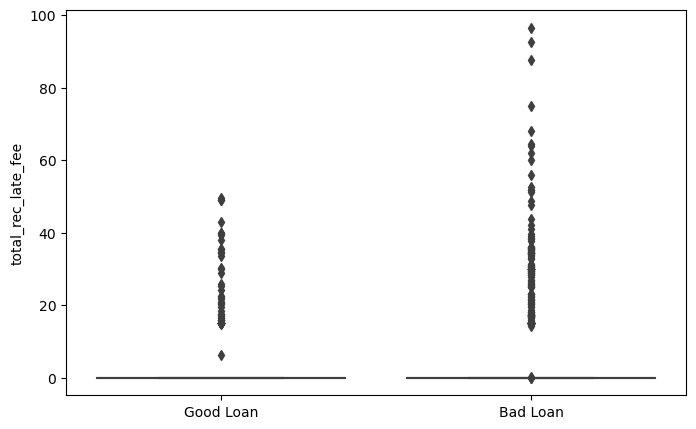

In [50]:
# Box Plot to visualize outliers
# `total_rec_late_fee` 

ax = \
sns.boxplot(
    x='bad_loan', 
    y='total_rec_late_fee', 
    data=data
)

labels = ['Good Loan', 'Bad Loan']
ax.set_xticklabels(labels) 
ax.set(xlabel=None)

> `total_rec_late_fee` has 231 outliers (1.15%) refers to the total amount of fees charged for late payments on a loan or credit account.

> For what we see in the plot above, I want to keep the data, by applying the binning method (width)

#### c) Handle Outliers 

Before handling with the outliers, we will **split our data by train and test**.

In [51]:
X = data.drop(['bad_loan'], axis=1)
y = data['bad_loan']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [53]:
print(X_train.shape)
print(X_test.shape)

(15000, 14)
(5000, 14)


- `annual_inc`: Binning depth method

In [54]:
# 'annual_inc' : Binning depth method

disc_quantile_estimator = KBinsDiscretizer(n_bins=[4], encode='ordinal', strategy='quantile')

In [55]:
X_train['annual_inc'] = disc_quantile_estimator.fit_transform(X_train[['annual_inc']])
X_test['annual_inc'] = disc_quantile_estimator.transform(X_test[['annual_inc']])

<AxesSubplot:ylabel='Frequency'>

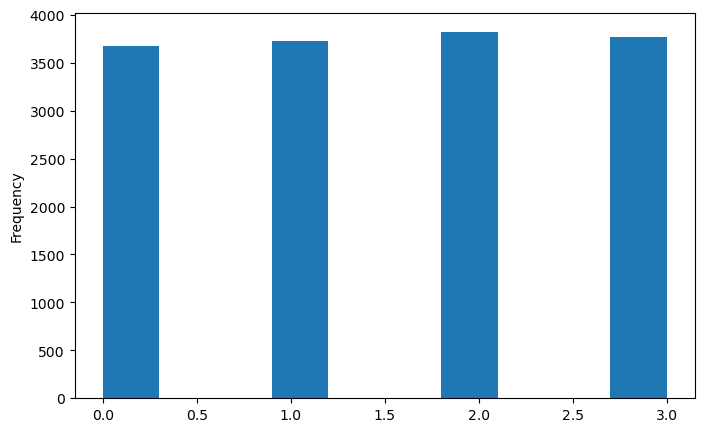

In [56]:
X_train['annual_inc'].plot.hist()

- `revol_util`: drop outlier

In [57]:
# 'revol_util': drop one of the outliers and keep the other one

In [58]:
mask_outliers_revol_util = (X_train['revol_util'] > 4000) | (X_train['revol_util'] < 0)

print('Number of outliers in age =', mask_outliers_revol_util.sum())

Number of outliers in age = 1


> **Note:** Above, we can confirm that our outlier is in X_train dataset. Now we can handle it. As we said above, we drop this outlier.

In [59]:
X_train = X_train[~mask_outliers_revol_util]
y_train = y_train[~mask_outliers_revol_util]

print(X_train.shape)
print(y_train.shape)

(14999, 14)
(14999,)


- `total_rec_late_fee`: Binning method (equal-witdh)

<AxesSubplot:ylabel='Frequency'>

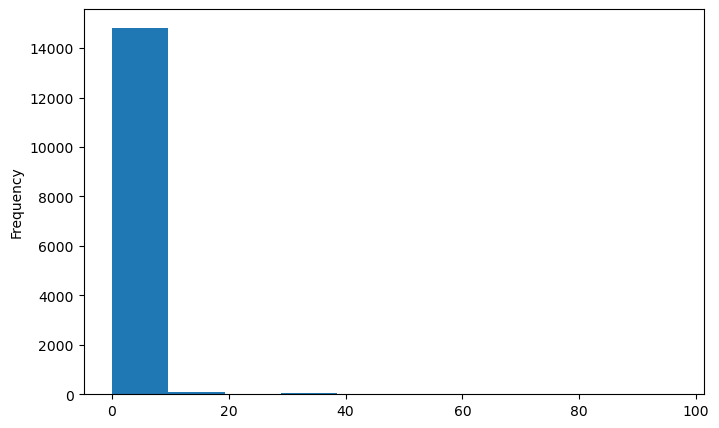

In [60]:
X_train['total_rec_late_fee'].plot.hist()

In [61]:
disc_uniform_estimator = KBinsDiscretizer(n_bins=[6], encode='ordinal', strategy='uniform')

In [62]:
X_train['total_rec_late_fee'] = disc_uniform_estimator.fit_transform(X_train[['total_rec_late_fee']])
X_test['total_rec_late_fee'] = disc_uniform_estimator.transform(X_test[['total_rec_late_fee']])

<AxesSubplot:ylabel='Frequency'>

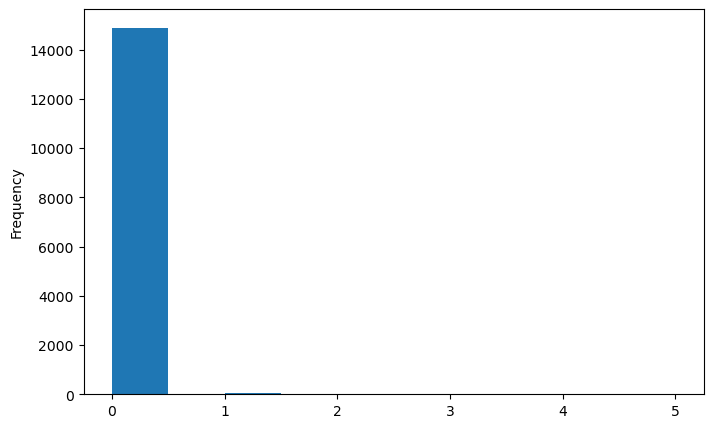

In [63]:
X_train['total_rec_late_fee'].plot.hist()

In [64]:
X_train['total_rec_late_fee'].value_counts()

0.0    14892
1.0       63
2.0       29
3.0       11
5.0        2
4.0        2
Name: total_rec_late_fee, dtype: int64

# EXERCISE 6

Deal with the **missing values**, along with anomalies. Detect and eliminate them. Remember: not all missing values are represented by a `np.nan`.

In [65]:
# To detect missing values 

missing_values_percentage_train = round(X_train.isnull().mean()*100,2)
missing_values_percentage_test = round(X_test.isnull().mean()*100,2)


missing_values_train = pd.concat([X_train.dtypes.to_frame('Data type'), X_train.isnull().sum().to_frame('N Missing Values'), missing_values_percentage_train.to_frame('% Missing Values')], axis =1)
missing_values_test = pd.concat([X_test.dtypes.to_frame('Data type'), X_test.isnull().sum().to_frame('N Missing Values'), missing_values_percentage_test.to_frame('% Missing Values')], axis = 1)

print('Number of missing values in X_train: \n', missing_values_train)
print('_______________________________________')
print('Number of missing values in X_test: \n', missing_values_test)

Number of missing values in X_train: 
                       Data type  N Missing Values  % Missing Values
id                        int64                 0              0.00
grade                    object                 0              0.00
annual_inc              float64                 0              0.00
short_emp                 int64                 0              0.00
emp_length_num            int64                 0              0.00
home_ownership           object              1117              7.45
dti                     float64               116              0.77
purpose                  object                 0              0.00
term                     object                 0              0.00
last_delinq_none          int64                 0              0.00
last_major_derog_none   float64             14564             97.10
revol_util              float64                 0              0.00
total_rec_late_fee      float64                 0              0.00
od_ratio 

In [66]:
print('X_train shape:', X_train.shape)
print('--------------------------')
print('X_test shape:', X_test.shape)

X_train shape: (14999, 14)
--------------------------
X_test shape: (5000, 14)


As we can observe above, we have missing values in:
- `home_ownership` - categorical variable - (7.45% of missing values in X_train), handle missing values by imputation with TCL mode.
- `dti` - numerical variable -  (0.77% of missing values in X_train), handle missing values by imputation with TCL median.
- `last_major_derog_none` - numerical variable - (97.10% of missing values in X_train), drop variable.

#### a) `home_ownership`

In [67]:
# Imputation using  Scikit-learn: mode

imr_most_frequent = SimpleImputer(strategy='most_frequent')

X_train['home_ownership'] = imr_most_frequent.fit_transform(X_train[['home_ownership']])
X_test['home_ownership'] = imr_most_frequent.transform(X_test[['home_ownership']])

In [68]:
print('N missing values X_train:', X_train['home_ownership'].isnull().sum())
print('--------------------------')
print('N missing values X_test:', X_test['home_ownership'].isnull().sum())

N missing values X_train: 0
--------------------------
N missing values X_test: 0


#### b) `dti`

<AxesSubplot:ylabel='Frequency'>

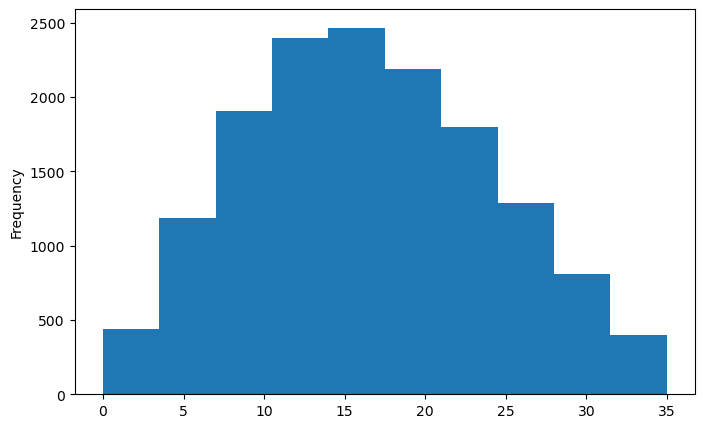

In [69]:
# Check distribution on `dti`

X_train['dti'].plot.hist()

In [70]:
# Imputation using  Scikit-learn: median

imr_median = SimpleImputer(strategy='median')

X_train['dti'] = imr_median.fit_transform(X_train[['dti']])
X_test['dti'] = imr_median.transform(X_test[['dti']])

In [71]:
print('N missing values X_train:', X_train['dti'].isnull().sum())
print('--------------------------')
print('N missing values X_test:', X_test['dti'].isnull().sum())

N missing values X_train: 0
--------------------------
N missing values X_test: 0


#### c) `last_major_derog_none` 

In [72]:
# Drop `last_major_derog_none` 

X_train.drop('last_major_derog_none', axis = 1, inplace=True ) 
X_test.drop('last_major_derog_none', axis = 1, inplace=True )

> **Note:** We dropped this variable, because it's almost all the observation is missing, so we don't gain any value to the model doing a imputation of the missing values, the best decision is to drop it. 

In [73]:
# Check dataset shape

print('X_train shape:', X_train.shape)
print('-------------')
print('X_test shape:', X_test.shape)

X_train shape: (14999, 13)
-------------
X_test shape: (5000, 13)


# EXERCISE 7

**Feature Selection**. Select at least two numerical features to drop. Justify the method(s) you used, and why you chose those variables. (Note: you can drop more variables, either categorical or numerical.)

In [74]:
# Numerical variables, Check dataset 

numeric_cols_X_train = X_train.select_dtypes(include=['number'])
numeric_cols_X_test = X_test.select_dtypes(include=['number'])

numeric_cols_X_train

,id,annual_inc,short_emp,emp_length_num,dti,last_delinq_none,revol_util,total_rec_late_fee,od_ratio
5514,7635079,1.0,0,2,31.26,1,96.7,0.0,0.094220
1266,10616209,2.0,0,6,11.33,1,42.1,0.0,0.210340
5864,7668384,0.0,0,11,22.15,0,14.8,0.0,0.247907
15865,5949441,0.0,0,5,13.37,1,84.8,0.0,0.528846
12892,5610038,2.0,0,5,13.68,0,21.4,0.0,0.512339
...,...,...,...,...,...,...,...,...,...
11284,9035653,1.0,0,4,11.15,0,32.3,0.0,0.788303
11964,9197716,2.0,0,6,11.17,1,57.8,0.0,0.556421
5390,7515591,3.0,1,0,14.00,1,33.1,0.0,0.578683
860,10153588,3.0,0,8,8.55,0,31.9,0.0,0.444177


#### a) Applying Variance Threshold: Numerical Variables

In [75]:
var_th = VarianceThreshold(threshold=0.05)
var_th.fit_transform(numeric_cols_X_train)
var_th.transform(numeric_cols_X_test)

array([[8.97609700e+06, 1.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 2.72000000e+01, 6.77040457e-01],
       [1.07470450e+07, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 4.16000000e+01, 4.60865786e-01],
       [8.60609300e+06, 3.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 5.51000000e+01, 9.98589931e-01],
       ...,
       [7.66744400e+06, 2.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 7.45000000e+01, 4.44069510e-01],
       [8.83557200e+06, 2.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 4.71000000e+01, 1.24610706e-01],
       [5.78524500e+06, 3.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 3.34000000e+01, 2.10165046e-01]])

In [76]:
var_th.get_support()

array([ True,  True,  True,  True,  True,  True,  True, False,  True])

In [77]:
numeric_cols_X_train.columns

Index(['id', 'annual_inc', 'short_emp', 'emp_length_num', 'dti',
       'last_delinq_none', 'revol_util', 'total_rec_late_fee', 'od_ratio'],
      dtype='object')

> According the Variance Threshold, we should drop `total_rec_late_fee`, but before I want to check the pearson correlation of `total_rec_late_fee` with the target, and respectively pvalue. 

#### b) Correlation: Numerical Variables

In [78]:
# Numerical variables, Check dataset 

numeric_cols_X_train = X_train.select_dtypes(include=['number'])
numeric_cols_X_test = X_test.select_dtypes(include=['number'])

numeric_cols_X_train

,id,annual_inc,short_emp,emp_length_num,dti,last_delinq_none,revol_util,total_rec_late_fee,od_ratio
5514,7635079,1.0,0,2,31.26,1,96.7,0.0,0.094220
1266,10616209,2.0,0,6,11.33,1,42.1,0.0,0.210340
5864,7668384,0.0,0,11,22.15,0,14.8,0.0,0.247907
15865,5949441,0.0,0,5,13.37,1,84.8,0.0,0.528846
12892,5610038,2.0,0,5,13.68,0,21.4,0.0,0.512339
...,...,...,...,...,...,...,...,...,...
11284,9035653,1.0,0,4,11.15,0,32.3,0.0,0.788303
11964,9197716,2.0,0,6,11.17,1,57.8,0.0,0.556421
5390,7515591,3.0,1,0,14.00,1,33.1,0.0,0.578683
860,10153588,3.0,0,8,8.55,0,31.9,0.0,0.444177


<AxesSubplot:>

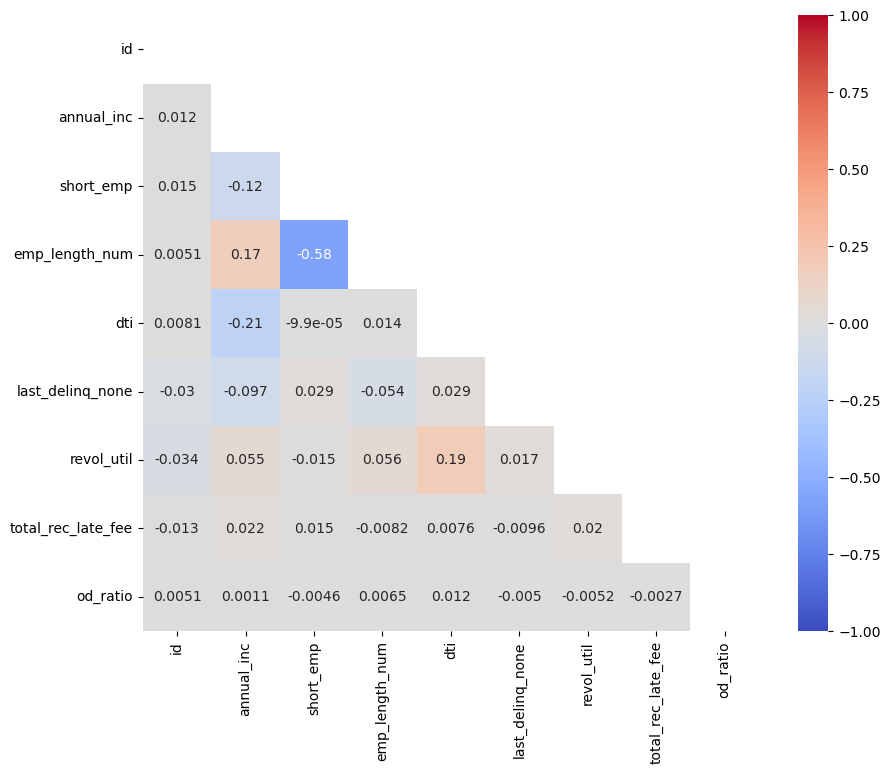

In [79]:
# Check correlation once again with heatmap # pearson

fig, ax = plt.subplots(figsize=(10, 8))


corr = X_train.corr(method="pearson")

mask = np.triu(np.ones_like(corr))

sns.heatmap(
    corr, vmin=-1, vmax=1, annot=True, square=True, cmap="coolwarm",
    mask=mask
)

<AxesSubplot:>

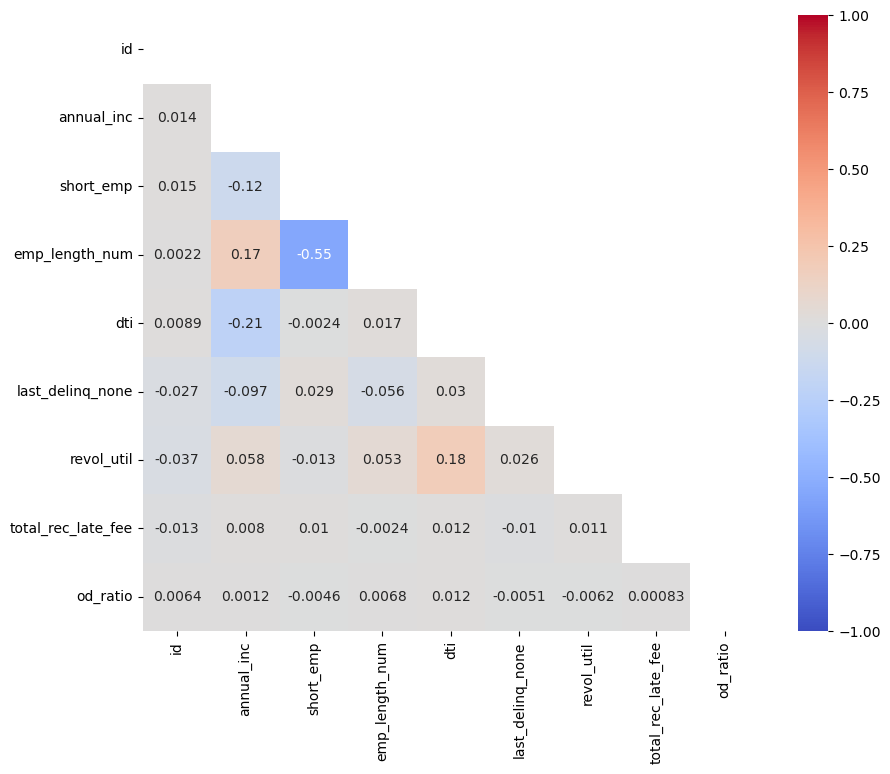

In [80]:
# Check correlation once again with heatmap # spearman

fig, ax = plt.subplots(figsize=(10, 8))


corr = X_train.corr(method="spearman")

mask = np.triu(np.ones_like(corr))

sns.heatmap(
    corr, vmin=-1, vmax=1, annot=True, square=True, cmap="coolwarm",
    mask=mask
)

> In the 2 plot above we are checking the correlation betweem variables, and our goal is for them to be more independent as possible (lower correlation between them).  So the most correlated are `emp_length_num` with `short_emp` (which make sense), we can drop one of them. On the next steps we will check the correlation spearmen and pearson with the target, and then we will decide which one should be dropped.

> The second higher correlation is between `dti` and `annual_inc`, which also make sense. We can drop also one of them.

In [81]:
# Check correlation all features vs target # pearson

for col in numeric_cols_X_train.columns:
    corr, pval = stats.pearsonr(numeric_cols_X_train[col], y_train)
    print(col, '-->', corr, '|' ,'pvalue = ',pval)

id --> -0.035606623178380294 | pvalue =  1.2901025040432077e-05
annual_inc --> -0.1298440739802706 | pvalue =  2.122608564186085e-57
short_emp --> 0.0353630977650912 | pvalue =  1.4781011118633913e-05
emp_length_num --> -0.03684840568205773 | pvalue =  6.361743503174781e-06
dti --> 0.137728443694919 | pvalue =  2.022873214870772e-64
last_delinq_none --> 0.013793182918748967 | pvalue =  0.09118182653712255
revol_util --> 0.10487082813771434 | pvalue =  5.984782450454943e-38
total_rec_late_fee --> 0.11289266980591176 | pvalue =  9.733724617664834e-44
od_ratio --> 0.001370012880167895 | pvalue =  0.8667625512304105


> Above we already add decided to select one variable between `emp_length_num` and `short_emp`, and `dti` and `annual_inc`.

> Based in the correlation above calculated and the respectively pvalue, the variables that we will drop are `annual_inc` and `short_emp`, because `annual_inc` is less correlated with the target than `dti`, and `short_emp` is less correlated with the target than `emp_length_num` .

> We are also dropping the variable `id`, because this variable doesn´t bring any value to our model. 

> Finally, we won't drop `total_rec_late_fee`, because has a good correlation with the target.

#### c) Dropping numerical variables

In [82]:
# `annual_inc`

X_train.drop('annual_inc', axis = 1, inplace = True)
X_test.drop('annual_inc', axis = 1, inplace = True)

In [83]:
# `annual_inc`

X_train.drop('short_emp', axis = 1, inplace = True)
X_test.drop('short_emp', axis = 1, inplace = True)

In [84]:
X_train.drop('id', axis = 1, inplace = True)
X_test.drop('id', axis = 1, inplace = True)

#### d) Categorical variables: Chi-square test

In [85]:
# Get categorical variables

categorical_X_train = X_train.select_dtypes(include=['object', 'category'])
categorical_X_test = X_test.select_dtypes(include=['object', 'category'])

categorical_X_train.columns.tolist()

['grade', 'home_ownership', 'purpose', 'term']

In [86]:
for col in categorical_X_train.columns:
    table = pd.crosstab(categorical_X_train[col], y_train)
    print('\n', table)
    chi, pval, _, expected_table = stats.chi2_contingency(table)
    print('Chi:', round(chi,2),'| Feature:', col, '| p-value:', pval)


 bad_loan     0    1
grade              
A         1532   98
B         3937  584
C         3307  858
D         1925  746
E          833  403
F          389  261
G           78   48
Chi: 760.85 | Feature: grade | p-value: 4.420468089863186e-161

 bad_loan           0     1
home_ownership            
MORTGAGE        7029  1513
OWN              933   241
RENT            4039  1244
Chi: 69.72 | Feature: home_ownership | p-value: 7.260181794799054e-16

 bad_loan               0     1
purpose                       
car                  109    23
credit_card         2602   518
debt_consolidation  7353  1855
home_improvement     664   167
house                 64    10
major_purchase       232    70
medical              101    29
moving                67    25
other                558   210
small_business       133    61
vacation              67    19
wedding               51    11
Chi: 72.66 | Feature: purpose | p-value: 3.809151431065511e-11

 bad_loan       0     1
term                  
 

In [87]:
expected_table

array([[1.92028802e+01, 4.79711981e+00],
       [8.99654937e+03, 2.24745063e+03],
       [2.98524775e+03, 7.45752250e+02]])

> After running the chi-square test, I decided to not drop any categorical variable, due to the very good pvalues we got from the analysis. 

# EXERCISE 8

**Pipelines** (scikit-learn). Load the dataset again and **select only the numerical variables**.

In [88]:
# Load data

data = pd.read_csv('data/final_project_lending.csv', low_memory=False)

# Define `bad_loan` as category

data['bad_loan'] = data['bad_loan'].astype('category')


data_num = data.select_dtypes(include=['number'])


print(data_num.shape)

(20000, 10)


 ### EXERCISE 8.1
 
Create a pipeline with three steps: 
- (1) [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html) with `strategy=’median’`; 
- (2) One Scaler you may know; 
- (3) [Principal Component Analysis](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) (with final 5 features)

In [89]:
# Create a Pipeline

my_pipeline = Pipeline([
    ('stept 1_imputer', SimpleImputer(strategy='median')), 
    ('stept 2_scaler', StandardScaler()), 
    ('stept 3_pca', PCA(n_components=5)), 
])

In [90]:
# Check steps 

my_pipeline.steps

[('stept 1_imputer', SimpleImputer(strategy='median')),
 ('stept 2_scaler', StandardScaler()),
 ('stept 3_pca', PCA(n_components=5))]

 ### EXERCISE 8.2

Fit and Transform your dataset.

In [91]:
data_num_transformed = my_pipeline.fit_transform(data_num)


In [92]:
print('data_num shape:', data_num.shape)
print('data_num_transformed shape:', data_num_transformed.shape)

data_num shape: (20000, 10)
data_num_transformed shape: (20000, 5)


In [93]:
# Explained variance ratio is a statistical measure of how much variation in a dataset can be attributed to each of the principal components (eigenvectors) generated by the principal component analysis (PCA) method.

explained_variance_ratio = my_pipeline.named_steps['stept 3_pca'].explained_variance_ratio_
total_perc_explained_variance_ratio = round(explained_variance_ratio.sum()*100,2)

print('Explained variance ratio:', my_pipeline.named_steps['stept 3_pca'].explained_variance_ratio_)
print('Total of explained variance ratio (5 componentes):', str(total_perc_explained_variance_ratio)+'%')

Explained variance ratio: [0.16383439 0.12404396 0.10877601 0.10221934 0.10046535]
Total of explained variance ratio (5 componentes): 59.93%


In [94]:
# Explained variance  

my_pipeline.named_steps['stept 3_pca'].explained_variance_

array([1.6384258 , 1.24050161, 1.08781453, 1.02224454, 1.00470378])

 ### EXERCISE 8.3
 
Comment what you obtained.

After fit and transform our dataset, with our 3 steps, we reduced our dataset in 5 variables (due to PCA).

Before begining with the results from the PCA, let's start my introducing the concepts of:

- **Explained variance:** statistical measure of how much variation in a dataset can be attributed to each of the principal components (eigenvectors) generated by the principal component analysis (PCA) method.

- **Explained variance ratio:** the percentage of variance that is attributed by each of the selected components. 


Well, as we can observe on the exercise `8.2` the 5 components all together have a total variance explained ratio of **59.93%**, which means that our daset original aproximately 30.07% of variance explained ratio than our 5 components together. I think in the context of our dataset, I would use the origal dataset then the 5 components transformed with PCA. But this decision with depend on the model I want to use for predicting my target, for now is just a thought.   

This ratio is not good or bad, it will always depende of our context, the models we want to apply our dataset (some models work better with less variables), or other factors.

# EXERCISE 9

Create a new Pipeline with, **at least, one Transformer created by you**. This Transformer should help on solving one of the issues the dataset has such as for example, outliers, dropping columns based on any particular characteristic, encoding, etc. Then, fit and transform the dataset. NOTE: you can choose to work only with **numerical** or **categorical** variables to ease your work.

> For this exercise, we will create a transformer to encoding our categorical variables. We will only work with categorical variables.

In [95]:
# Select only categorical variables

data_cat = data.select_dtypes(include=['object']) # because I don't want the target, which is already a bool.

data_cat.columns

Index(['grade', 'home_ownership', 'purpose', 'term'], dtype='object')

In [96]:
data_cat.isnull().sum()

grade                0
home_ownership    1491
purpose              0
term                 0
dtype: int64

In [97]:
data_cat.isnull().mean()

grade             0.00000
home_ownership    0.07455
purpose           0.00000
term              0.00000
dtype: float64

In [98]:
# Tranformer # Enconding with OHE

class OrdinalEncoding(OrdinalEncoder):
    
    def __init__(self):
        super().__init__()
        
        return
        
    def fit(self, data_cat, y=None):
        super().fit(data_cat)
        return self
    
    def transform(self, data_cat):
        
        return super().transform(data_cat)

In [99]:
my_own_pipeline = Pipeline([
    ('stept 1_imputer', SimpleImputer(strategy='most_frequent')), 
    ('stept 2_encoding', OrdinalEncoding()), 
    ('stept 3_scaler', StandardScaler()),
])

In [100]:
my_own_pipeline.steps

[('stept 1_imputer', SimpleImputer(strategy='most_frequent')),
 ('stept 2_encoding', OrdinalEncoding()),
 ('stept 3_scaler', StandardScaler())]

In [101]:
data_cat_transformed = my_own_pipeline.fit_transform(data_cat)
data_cat_transformed = pd.DataFrame(data_cat_transformed, columns=data_cat.columns)

data_cat_transformed.head()

,grade,home_ownership,purpose,term
0,-1.496242,1.299103,-0.744517,-0.569946
1,-1.496242,0.229134,-0.744517,-0.569946
2,0.761952,-0.840835,-0.229779,1.724983
3,0.761952,-0.840835,1.829172,1.724983
4,0.761952,-0.840835,-0.229779,-0.569946


> **Note:** In thi pipeline, first we impute missing values with the mode (step 1), because we had missing values on the variable `home_ownership`, then applied the method Ordinal Encoder from Scikit Learn to encode our categorical variables, and finally we applied a scaler, so then all the variables are in the same scale.